In [9]:
import os
import pandas as pd
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [10]:
warnings.filterwarnings('ignore')
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'

#Valores escalonados
df = pd.read_csv(path + 'Clientes_LE_ESC.csv', sep = ';', encoding = 'utf-8')
df.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


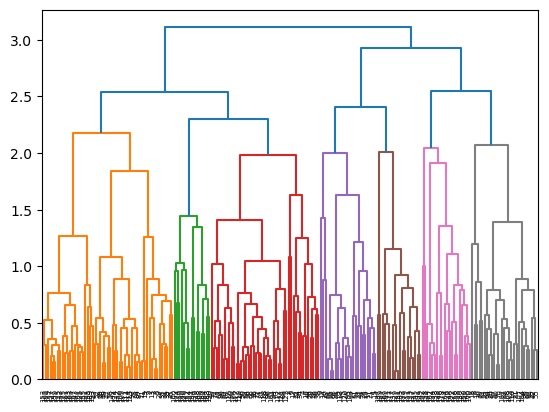

In [11]:
dados = df.iloc[:, 0:4].values
dendrograma = dendrogram(linkage(dados, method = 'average'))

In [12]:
cluster_hirarquico = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'average')
clusters = cluster_hirarquico.fit(dados)

In [13]:
cluster_id = clusters.labels_

In [14]:
cluster_id_column = pd.DataFrame(cluster_id, columns = ['ClusterID'])

In [15]:
df_2 = pd.read_csv(path + 'Clientes.csv', sep = ';', encoding = 'utf-8')
df_2 = pd.concat([df_2, cluster_id_column], axis = 1)
df_2

,ClienteID,Genero,Idade,Rendimento,Pontuacao,ClusterID
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [16]:
df_3 = df_2.loc[df_2.ClienteID == 131]
df_3

,ClienteID,Genero,Idade,Rendimento,Pontuacao,ClusterID
130,131,Male,47,71,9,3
